In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Vectors

### 1D Vectors

In [5]:
# As list
a = [10.5, 5.2, 3.25, 7.0]
a

[10.5, 5.2, 3.25, 7.0]

In [6]:
# As np array : Preferred
a = np.array([10.5, 5.2, 3.25, 7.0])
a

array([10.5 ,  5.2 ,  3.25,  7.  ])

In [11]:
print(a[2])
print(a.size)

3.25
4


### 2D Vectors

In [30]:
u = np.array([2, 5])
v = np.array([3, 1])

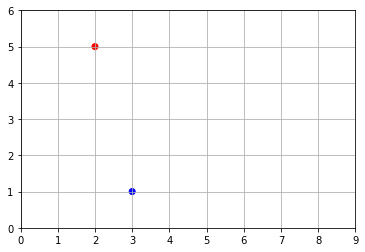

In [31]:
# plotting vectors
x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color = ["r", "b"])
plt.axis([0, 9, 0, 6])
plt.grid()

In [32]:
# Plotting Arrows

def plot_vector2D(vector2d, origin = [0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
    head_width = 0.2, head_length = 0.3, length_includes_head = True, **options)

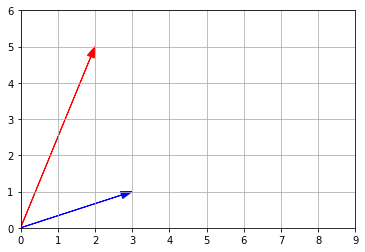

In [33]:
plot_vector2D(u, color = "r")
plot_vector2D(v, color = "b")
plt.axis([0, 9, 0, 6])
plt.grid()

### 3D Vectors

In [34]:
a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

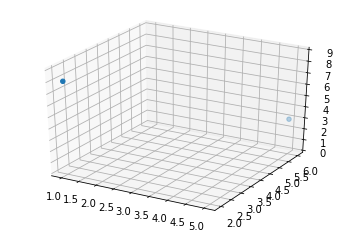

In [36]:
from mpl_toolkits.mplot3d import Axes3D
subplot3d = plt.subplot(111, projection = '3d')
x_coords, y_coords, z_coords = zip(a, b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
plt.show()

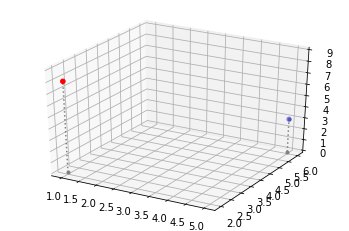

In [37]:
def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0, z], color="gray", linestyle='dotted', marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r","b"))
plt.show()

### Norm

In [39]:
def vector_norm(vector):
    squares = [i**2 for i in vector]
    return sum(squares)**0.5

print(u)
print(vector_norm(u))

[2 5]
5.385164807134504


In [41]:
np.linalg.norm(u)

5.385164807134504

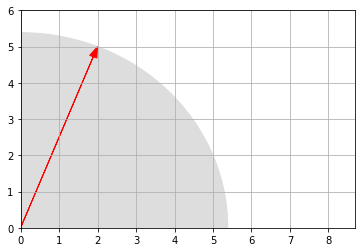

In [46]:
radius = np.linalg.norm(u)
plt.gca().add_artist(plt.Circle((0,0), radius, color = "#DDDDDD"))
plot_vector2D(u, color = "red")
plt.axis([0, 8.7, 0, 6])
plt.grid()

### Addition

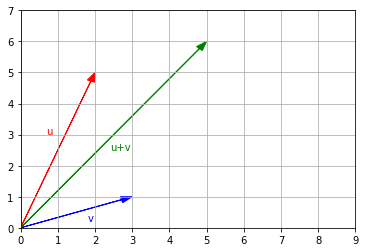

In [55]:
plot_vector2D(u, color = "red")
plt.text(0.7, 3, "u", color = "r")
plot_vector2D(v, color = "blue")
plt.text(1.8, 0.2,"v", color = "b")
plot_vector2D(u+v, color = "green")
plt.text(2.4, 2.5, "u+v", color = "g")
plt.axis([0, 9, 0, 7])
plt.grid()

In [61]:
v

array([3, 1])

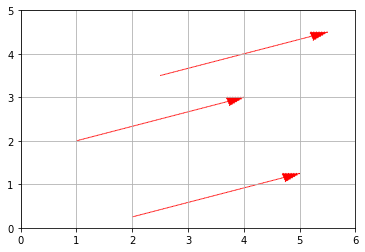

In [64]:
t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1, 2])

x_coords, y_coords = zip(t1, t2, t3, t1)
plot_vector2D(v, t1, color="r", linestyle=":") # Origin is t1
plot_vector2D(v, t2, color="r", linestyle=":")
plot_vector2D(v, t3, color="r", linestyle=":")
plt.axis([0, 6, 0, 5])
plt.grid()
# Bcos of addition the vectors are increased/moved in the direction of v

### Multiplication

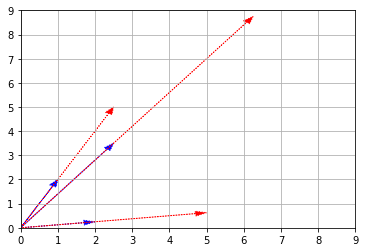

In [72]:
k = 2.5
t1c = k * t1
t2c = k * t2
t3c = k * t3

# Original
plot_vector2D(t1, color="b", linestyle=":") 
plot_vector2D(t2, color="b", linestyle=":")
plot_vector2D(t3, color="b", linestyle=":")

# Scalar Multiplication
plot_vector2D(t1c, color="r", linestyle=":") 
plot_vector2D(t2c, color="r", linestyle=":")
plot_vector2D(t3c, color="r", linestyle=":")
plt.axis([0, 9, 0, 9])
plt.grid()


### Division


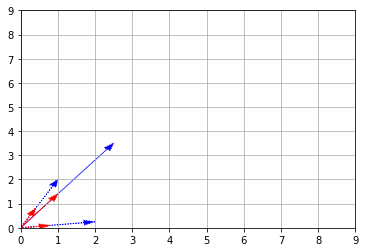

In [74]:
k = 2.5
t1c = t1/k
t2c = t2/k
t3c = t3/k

# Original
plot_vector2D(t1, color="b", linestyle=":") 
plot_vector2D(t2, color="b", linestyle=":")
plot_vector2D(t3, color="b", linestyle=":")

# Scalar Division
plot_vector2D(t1c, color="r", linestyle=":") 
plot_vector2D(t2c, color="r", linestyle=":")
plot_vector2D(t3c, color="r", linestyle=":")
plt.axis([0, 9, 0, 9])
plt.grid()


### Normalized Vector

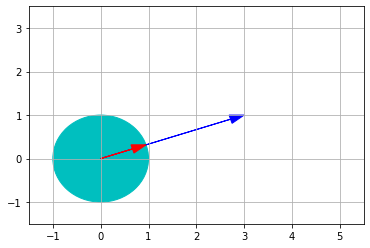

In [83]:
v_normalized = vector_norm(v)
v_normalized = v/v_normalized
plt.gca().add_artist(plt.Circle((0, 0), 1, color = 'c'))
plot_vector2D(v, color = "b")
plot_vector2D(v_normalized, color = "r")
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.grid()

### Norm is the unit vector in same direction

## Dot Product

In [84]:
def dot_product(v1, v2):
    return sum(v1i*v2i for v1i, v2i in zip(v1, v2))

dot_product(u, v)

11

In [88]:
np.dot(u, v)

11

In [89]:
u.dot(v)

11

In [90]:
# * is element wise multiplication

u*v

array([6, 5])

In [99]:
# Angle between vectors
def vectors_angle(u, v):
    angle = np.dot(u, v)/np.linalg.norm(u)/np.linalg.norm(v)
    angle = np.clip(angle, -1, 1)
    radians = np.arccos(angle)
    return radians*180/np.pi
vectors_angle(u, v)

49.76364169072618

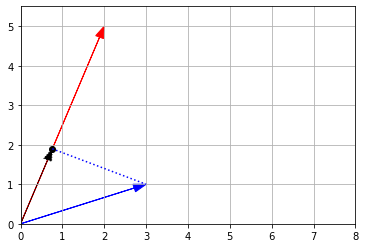

In [112]:
# Projecting v on u
## Projection of v on u

import numpy.linalg as LA
u_normalized = u / LA.norm(u)
proj = v.dot(u_normalized) * u_normalized

plot_vector2D(u, color="r")
plot_vector2D(v, color="b")

plot_vector2D(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "ko")
plt.plot([proj[0], v[0]], [proj[1], v[1]], "b:")


plt.axis([0, 8, 0, 5.5])
plt.grid()
plt.show()

## Matrices

In [114]:
# np array is preferred over list of lists

A = np.array([
    [10, 20, 30],
    [40, 50, 60]
])
A

array([[10, 20, 30],
       [40, 50, 60]])

In [115]:
print(A.shape)
print(A.size)

(2, 3)
6


In [116]:
A[1, 2]

60

In [122]:
## 1D array output from slicing
A[:,1]

array([20, 50])

In [123]:
## Column vector from slicing
A[:, 1:2]

array([[20],
       [50]])

In [124]:
## Row vector from slicing
A[1:2, :]

array([[40, 50, 60]])

In [125]:
B = np.array([[1,2,3], [4, 5, 6]])
B

array([[1, 2, 3],
       [4, 5, 6]])

In [128]:
A*B

array([[ 10,  40,  90],
       [160, 250, 360]])

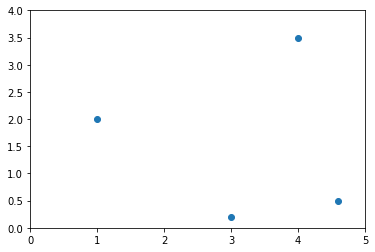

In [129]:
P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])
x_coords_P, y_coords_P = P
plt.scatter(x_coords_P, y_coords_P)
plt.axis([0, 5, 0, 4])
plt.show()

In [131]:
def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color="blue", linestyle="--")
            plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()

P_rescaled = 0.60 * P
plot_transformation(P, P_rescaled, "$P$", "$0.6 P$", arrows=True)
plt.show()

NameError: name 'plot_vector2d' is not defined

In [132]:
F_shear = np.array([
        [1, 1.5],
        [0, 1]
    ])
plot_transformation(P, F_shear.dot(P), "$P$", "$F_{shear} P$",
                    axis=[0, 10, 0, 7])
plt.show()

NameError: name 'Polygon' is not defined